In [2]:
import pandas as pd

df=pd.read_table(r'D:/Projects/Python/All-Machine-Learning\Projects\Watsapp Group Analysis\WhatsApp Chat.txt',error_bad_lines=False)
df.columns=["Raw"]
df_new=df['Raw'].str.split(': ', 1, expand=True)
df_new.columns=['Time','Message']
print(df_new.head())
MsgTable=df_new['Time'].str.split('M - ',1,expand=True)
MsgTable.columns=['Timestamp','Name']
MsgTable['Message']=df_new['Message']


b'Skipping line 2029: expected 1 fields, saw 2\nSkipping line 4430: expected 1 fields, saw 2\nSkipping line 5962: expected 1 fields, saw 2\nSkipping line 5963: expected 1 fields, saw 2\nSkipping line 5964: expected 1 fields, saw 2\nSkipping line 5965: expected 1 fields, saw 2\nSkipping line 5966: expected 1 fields, saw 2\nSkipping line 5967: expected 1 fields, saw 2\nSkipping line 5968: expected 1 fields, saw 2\nSkipping line 5969: expected 1 fields, saw 2\nSkipping line 5970: expected 1 fields, saw 2\nSkipping line 5971: expected 1 fields, saw 2\nSkipping line 5972: expected 1 fields, saw 2\nSkipping line 5973: expected 1 fields, saw 2\nSkipping line 5974: expected 1 fields, saw 2\nSkipping line 46025: expected 1 fields, saw 2\nSkipping line 46026: expected 1 fields, saw 2\nSkipping line 46027: expected 1 fields, saw 2\nSkipping line 46029: expected 1 fields, saw 2\nSkipping line 46030: expected 1 fields, saw 2\n'


                                 Time          Message
0      22/12/16, 9:59 AM - Nikil Play  <Media omitted>
1      22/12/16, 9:59 AM - Nikil Play        Panda son
2          22/12/16, 10:06 AM - Theja              Lol
3  22/12/16, 10:10 AM - hrushikesh ms                😂
4   22/12/16, 11:06 AM - Lola Infosys  <Media omitted>


['Nikil Play' 'Theja' 'hrushikesh ms' 'Lola Infosys' 'Arun Bhadardwaj'
 'Vishak' 'Anni jss' 'Nagendra' 'Ba' 'Chatura' 'Bhavan Play' 'Vinay']
Nikil Play
1569    panda
1582       👍🏼
384      bhai
308         😂
267        ya
Name: Word, dtype: object


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


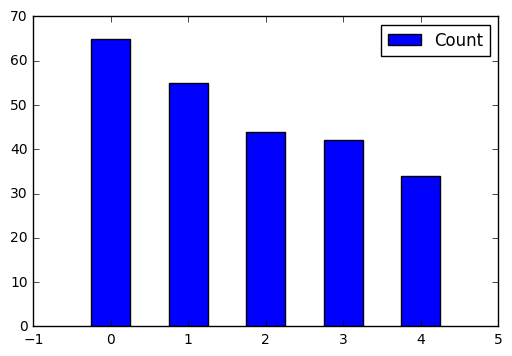

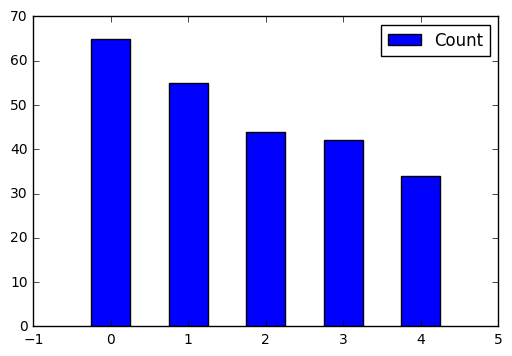

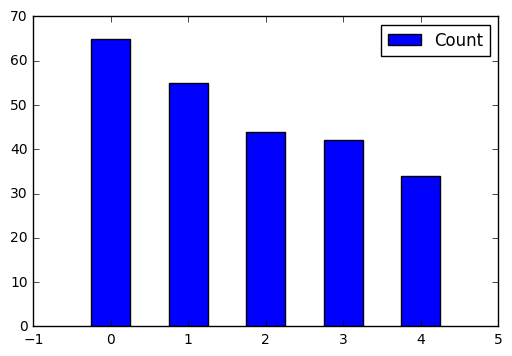

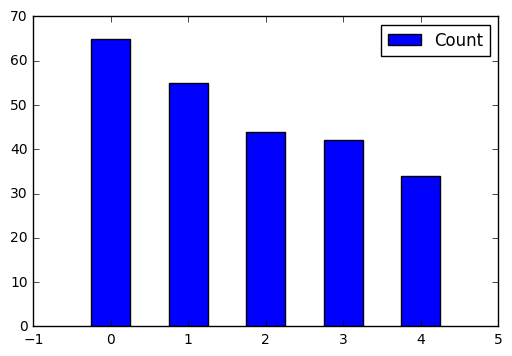

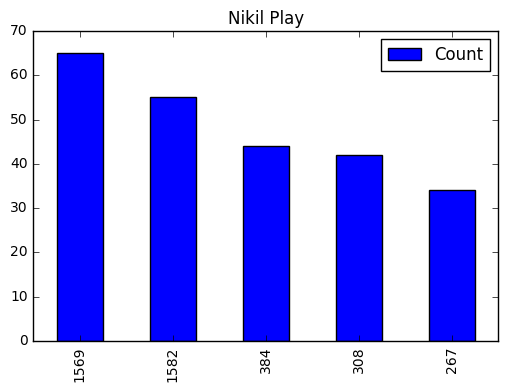

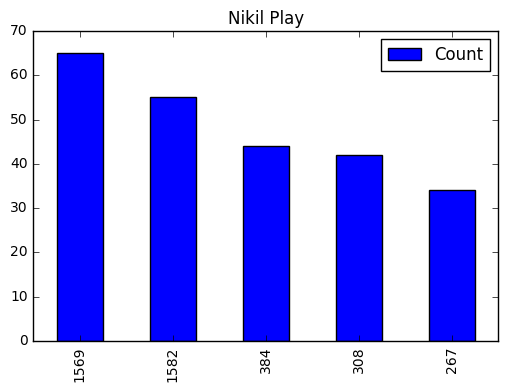

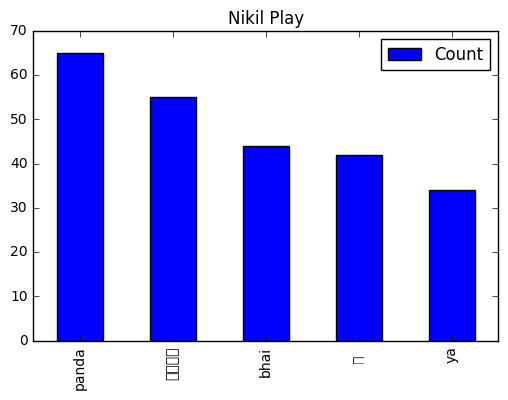

Theja
95      lol
255      gp
204       😂
758    come
83     guys
Name: Word, dtype: object


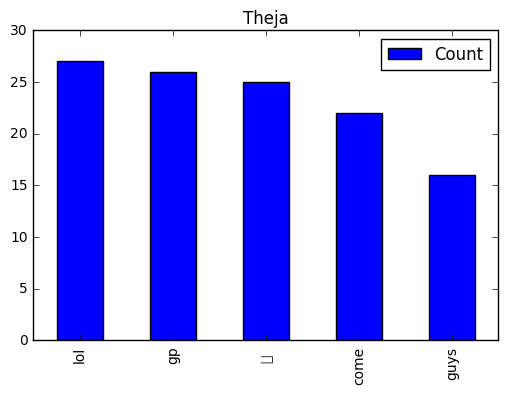

hrushikesh ms
992     panda
1276        😁
5         dei
560        ab
1404       👍🏼
Name: Word, dtype: object


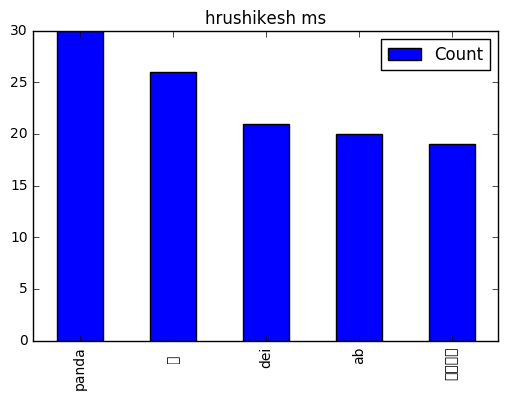

Lola Infosys
2114     naga
2522      lol
1915    panda
1583        n
2630        😂
Name: Word, dtype: object


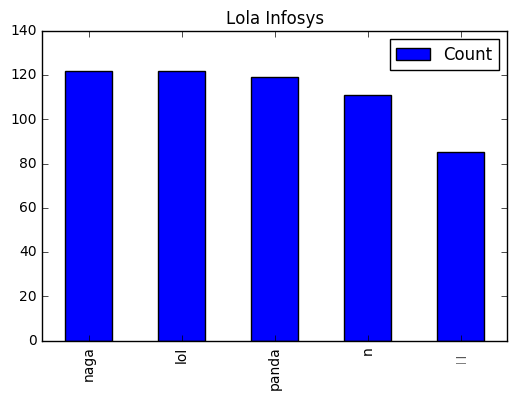

Arun Bhadardwaj
3704      lol
3440    panda
3105     naga
1313     come
2033        😂
Name: Word, dtype: object


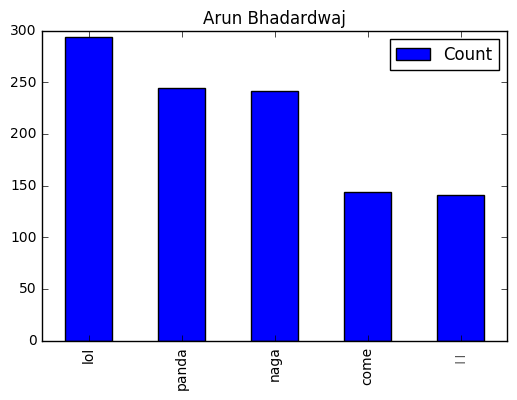

Vishak
1002       😆
278       ya
4185    arun
4405      ok
2446    nagi
Name: Word, dtype: object


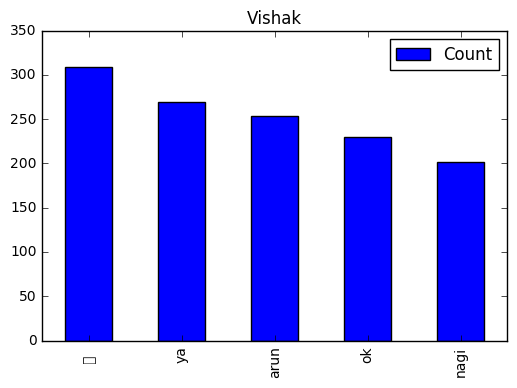

Anni jss
773         😂😂
3219     panda
3595         😁
3386      naga
2394    thanks
Name: Word, dtype: object


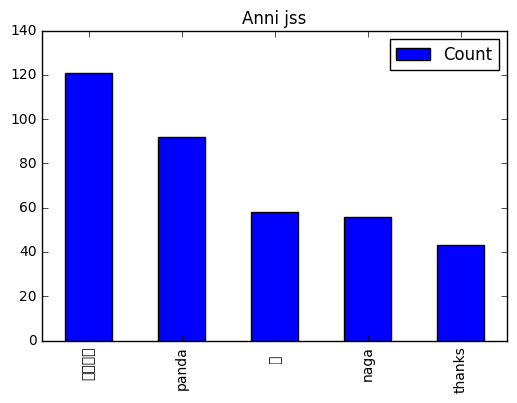

Nagendra
2488        😂
812      come
1460        n
2211    panda
2891       ok
Name: Word, dtype: object


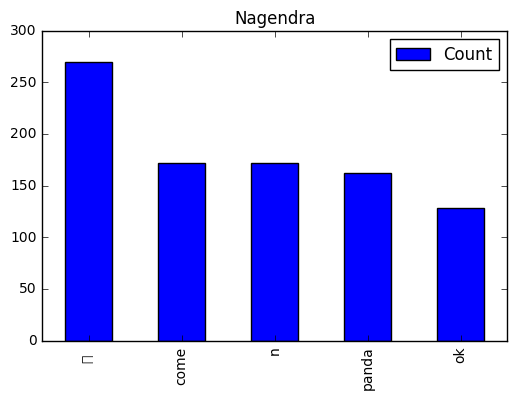

Ba
2313     n
954     ok
1100    ha
2851     ,
1783    ya
Name: Word, dtype: object


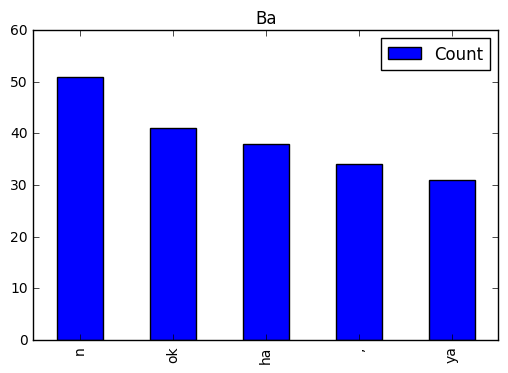

Chatura
948      naga
1580       lo
1541    panda
459       nin
1073    ninge
Name: Word, dtype: object


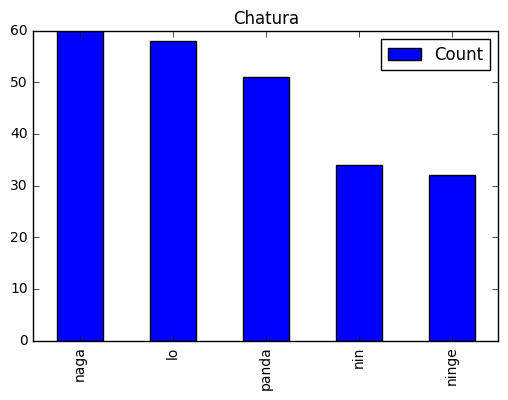

Bhavan Play
187     lol
776      😂😂
1126     ha
358       😂
326     😂😂😂
Name: Word, dtype: object


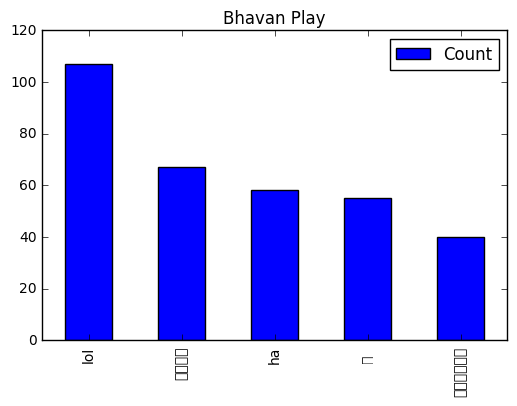

Vinay
156       happy
97     birthday
147          👍🏻
22            😎
44          ani
Name: Word, dtype: object


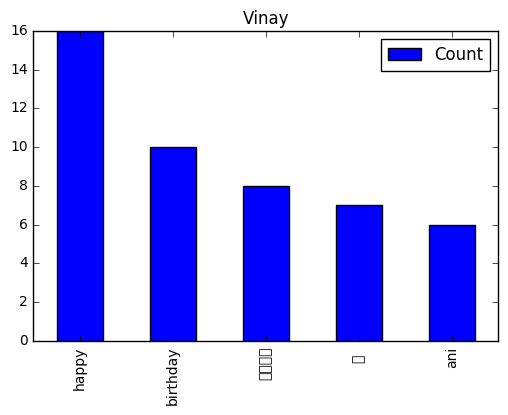

In [33]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#import seaborn as sns

MsgTable['Message']=MsgTable['Message'].astype(str)
MsgTable=MsgTable[MsgTable.Name.str.contains("changed" or "removed" or "added")==False]
Names=MsgTable.Name.unique()[0:12]

print(Names)
plot_number=1
#fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
for name in Names:
    print(name)
    MsgTableTemp=MsgTable.loc[MsgTable['Name']==name]
    MsgList = MsgTableTemp['Message'].tolist()
    

    stop_words = set(stopwords.words('english'))
    WordList=' '.join(MsgTableTemp['Message']).lower().split()
    filtered_WordList = [w for w in WordList if not w in stop_words]


    from collections import Counter
    df = pd.DataFrame.from_dict(dict(Counter(filtered_WordList)), orient='index').reset_index()
    df.columns =['Word','Count']
    DropWords = ['','pm','?','and','-','u','to','for','with','of','in','..','<omitted','image','<media','omitted>','it','none','i','is','will','the','you']
    df['Word'].replace(DropWords, np.nan, inplace=True)
    df.dropna(subset=['Word'], inplace=True)
    df.sort(['Count'],ascending=False,inplace=True)
    #sns.distplot(df.head(),        kde = False, ax=ax[0][plot_number])
    df['Word'] = df['Word'].astype('str')
    labels=df['Word'].head()
    print(labels)
    dd = np.arange(len(labels))
    df.head().plot(kind='bar',title=name)
    plt.xticks(dd,labels)
    plt.show()
    ax[0][0].set_xlabel("Count")
    plot_number = plot_number + 1



# sns.set_style("whitegrid")
# ax = sns.barplot(x="Word", y="Count", data=df.head())
